In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_df = pd.read_csv("Resources/DataScience_salaries_2024.csv")
data_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
...,...,...,...,...,...,...,...,...,...,...,...
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L


In [3]:
year_data = data_df.sort_values('work_year')
#year_data["salary_in_usd"] = year_data["salary_in_usd"].map("${:,.0f}".format)
reduced_df = year_data[['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']]
renamed_df = renamed_df = reduced_df.rename(columns={"work_year":"Work Year", "experience_level":"Experience Level", "employment_type": "Employment Type", "job_title":"Job Title",
                                                     "salary_in_usd": "Salary (USD)", "employee_residence": "Employee Residence (Country)", "remote_ratio": "Remote Ratio", 
                                                     "company_location": "Location of Company", "company_size": "Company Size"
                                                
                                                     }).sort_values('Work Year')
location_filter = renamed_df['Location of Company'].value_counts()
clean_df = renamed_df[renamed_df['Location of Company'].isin(location_filter[location_filter > 14].index)]
clean_df

,Work Year,Experience Level,Employment Type,Job Title,Salary (USD),Employee Residence (Country),Remote Ratio,Location of Company,Company Size
14837,2020,EN,PT,ML Engineer,15966,DE,100,DE,S
14694,2020,MI,FT,Data Scientist,38776,ES,100,ES,M
12275,2020,MI,FT,Lead Data Analyst,87000,US,100,US,L
14164,2020,MI,FT,Data Engineer,59303,DE,100,DE,S
11490,2020,SE,FT,Big Data Engineer,114047,PL,100,GB,S
...,...,...,...,...,...,...,...,...,...
14602,2024,EN,FT,Data Science,37120,US,0,US,M
14603,2024,MI,FT,Data Engineer,46250,GB,100,GB,M
6472,2024,SE,FT,Data Scientist,151000,US,0,US,M
14581,2024,MI,FT,Data Science,47850,GB,0,GB,M


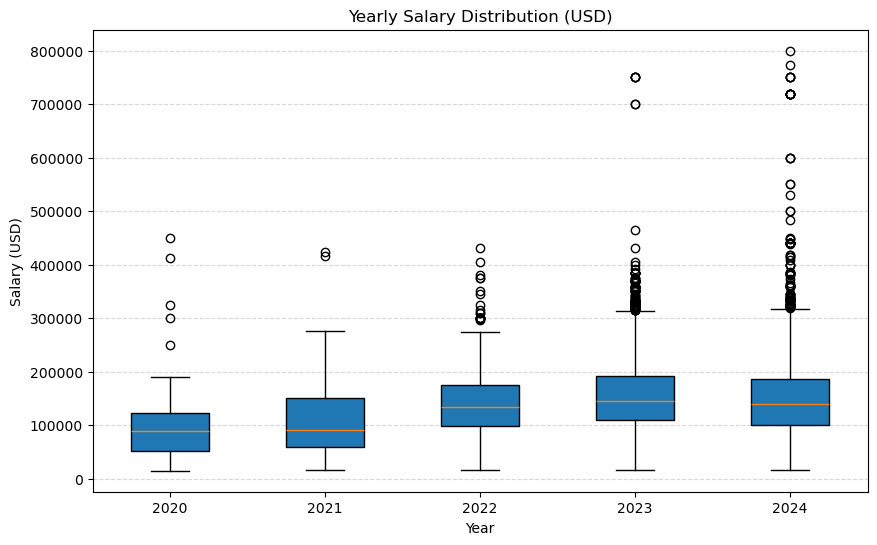

In [4]:
years = ["2020", "2021", "2022", "2023", "2024"]

# Create a dictionary to store salary data for each year
yearly_sal = {year: [] for year in years}

# Fill the dictionary with salary data
for index, row in clean_df.iterrows():
    year = str(row['Work Year'])
    if year in yearly_sal:
        yearly_sal[year].append(row['Salary (USD)'])

years = list(yearly_sal.keys())
salary_data = list(yearly_sal.values())

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(salary_data, labels=years, patch_artist=True)

# Set plot title and labels
plt.title('Yearly Salary Distribution (USD)')
plt.xlabel('Year')
plt.ylabel('Salary (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.savefig("images/yearly_salary_dist.png")
plt.show()

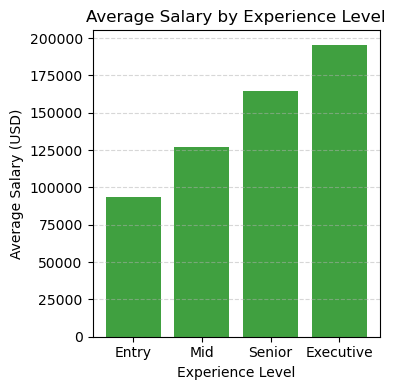

In [5]:
avg_salary_by_xp_df = clean_df.groupby('Experience Level')['Salary (USD)'].mean().reset_index().round(2)
avg_salary_by_xp_df = avg_salary_by_xp_df.sort_values(by='Salary (USD)', ascending=True)


label_mapping = {"EN": "Entry", "MI": "Mid", "SE": "Senior", "EX": "Executive"}
avg_salary_by_xp_df["Experience Level"] = avg_salary_by_xp_df["Experience Level"].map(label_mapping)

x_axis = np.arange(len(avg_salary_by_xp_df))
tick_locations = [value+0.4 for value in x_axis]


plt.figure(figsize=(4, 4))
plt.bar(x_axis, avg_salary_by_xp_df["Salary (USD)"], color='green', alpha=0.75, align="edge")
plt.xticks(tick_locations, avg_salary_by_xp_df["Experience Level"], rotation="horizontal")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")
plt.title("Average Salary by Experience Level")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("images/experience_salaries.png")
plt.show()

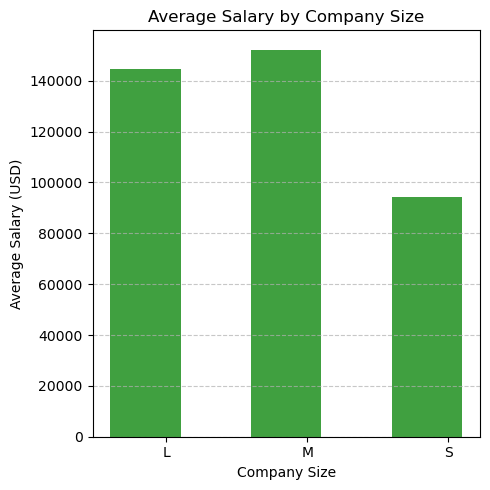

In [6]:
avg_salary_by_size_df = clean_df.groupby('Company Size')['Salary (USD)'].mean().reset_index().round(2)


x_axis = np.arange(len(avg_salary_by_size_df))
tick_locations = [value + 0.4 for value in x_axis]

plt.figure(figsize=(5, 5))
plt.bar(x_axis, avg_salary_by_size_df["Salary (USD)"], color='green', alpha=0.75, align="edge", width=0.5)
plt.xticks(tick_locations, avg_salary_by_size_df["Company Size"], rotation="horizontal")
plt.xlabel("Company Size")  # Corrected label
plt.ylabel("Average Salary (USD)")
plt.title("Average Salary by Company Size")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("images/size_salaries.png")
plt.show()

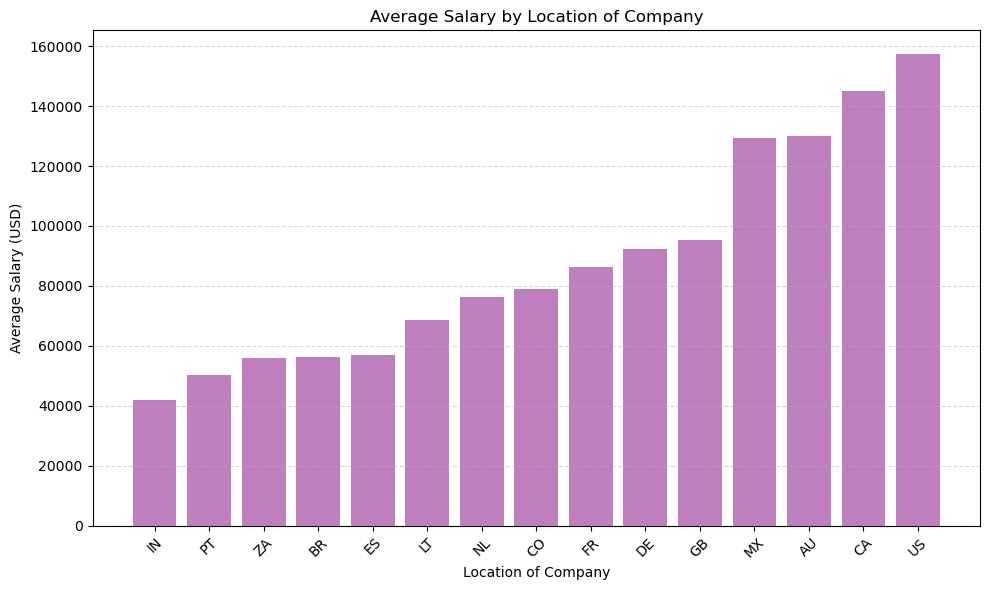

In [7]:
avg_salary_by_loc_df = clean_df.groupby('Location of Company')['Salary (USD)'].mean().reset_index().round(2)
avg_salary_by_loc_df = avg_salary_by_loc_df.sort_values(by='Salary (USD)', ascending=True)


x_axis = np.arange(len(avg_salary_by_loc_df))
tick_locations = [value + 0.4 for value in x_axis]


plt.figure(figsize=(10, 6))
plt.bar(x_axis, avg_salary_by_loc_df["Salary (USD)"], color='purple', alpha=0.5, align="edge")
plt.xticks(tick_locations, avg_salary_by_loc_df["Location of Company"], rotation= 45)
plt.xlabel("Location of Company") 
plt.ylabel("Average Salary (USD)")
plt.title("Average Salary by Location of Company") 
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("images/country_salaries.png")
plt.show()

<Figure size 500x500 with 0 Axes>

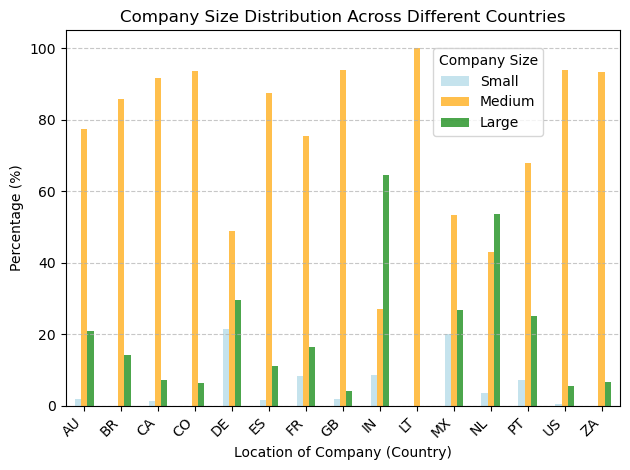

In [8]:
size_counts = clean_df.groupby('Location of Company')['Company Size'].value_counts().unstack()

# Calculate the total counts for each location
total_counts = size_counts.sum(axis=1)

# Calculate the percentage of each company size
percentage_S_counts = (size_counts['S'] / total_counts) * 100
percentage_M_counts = (size_counts['M'] / total_counts) * 100
percentage_L_counts = (size_counts['L'] / total_counts) * 100

# Combine percentages into a single DataFrame for plotting
percentage_df = pd.DataFrame({
    'Small': percentage_S_counts,
    'Medium': percentage_M_counts,
    'Large': percentage_L_counts
})

# Plot the data
plt.figure(figsize=(5, 5))

# Plot all three series at once with the correct colors
percentage_df.plot(kind='bar', color=['lightblue', 'orange', 'green'], alpha=0.7)

# Add titles and labels
plt.title('Company Size Distribution Across Different Countries')
plt.xlabel('Location of Company (Country)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Company Size', bbox_to_anchor=(.65, .7))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.savefig("images/size_country.png")
plt.show()

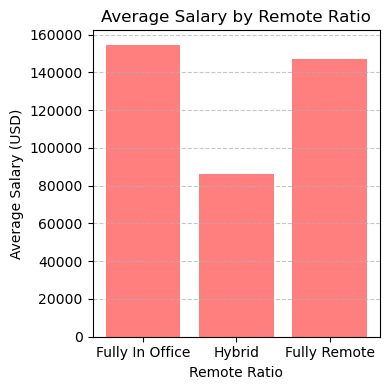

In [9]:
avg_salary_by_remote_ratio_df = clean_df.groupby('Remote Ratio')['Salary (USD)'].mean().reset_index().round(2)

label_mapping = {0: "Fully In Office", 50: "Hybrid", 100: "Fully Remote"}
avg_salary_by_remote_ratio_df["Remote Ratio"] = avg_salary_by_remote_ratio_df["Remote Ratio"].map(label_mapping)

x_axis = np.arange(len(avg_salary_by_remote_ratio_df))
tick_locations = [value+0.4 for value in x_axis]


plt.figure(figsize=(4, 4))
plt.bar(x_axis, avg_salary_by_remote_ratio_df["Salary (USD)"], color='red', alpha=0.5, align="edge")
plt.xticks(tick_locations, avg_salary_by_remote_ratio_df["Remote Ratio"], rotation="horizontal")
plt.xlabel("Remote Ratio")
plt.ylabel("Average Salary (USD)")
plt.title("Average Salary by Remote Ratio")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("images/remote_salaries.png")
plt.show()


Overall, the dataset proves that non-remote jobs, on average, offer a higher salary incentive than remote jobs

In [10]:
work_year_counts = clean_df['Work Year'].value_counts()

# Display the counts
print(work_year_counts)


Work Year
2023    8408
2024    4312
2022    1600
2021     179
2020      60
Name: count, dtype: int64


In [11]:
average_salaries_per_year = clean_df.groupby('Work Year')['Salary (USD)'].mean()

# Display the average salaries per year
print(round(average_salaries_per_year))

Work Year
2020    108704.0
2021    107265.0
2022    136514.0
2023    154798.0
2024    152319.0
Name: Salary (USD), dtype: float64


In [12]:
location_counts = clean_df['Location of Company'].value_counts()

# Display the counts
print(location_counts)

Location of Company
US    12975
GB      655
CA      392
ES      127
DE       98
FR       61
IN       59
AU       53
PT       28
NL       28
BR       21
CO       16
LT       16
MX       15
ZA       15
Name: count, dtype: int64


C:\Users\chadh\AppData\Local\Temp\ipykernel_15508\1000348762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Remote Ratio Label'] = clean_df['Remote Ratio'].map(label_map)


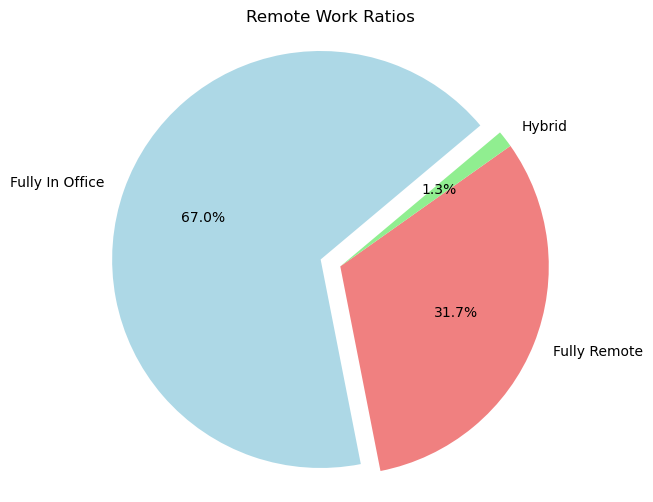

In [13]:



label_map = {100: 'Fully Remote', 50: 'Hybrid', 0: 'Fully In Office'}
clean_df['Remote Ratio Label'] = clean_df['Remote Ratio'].map(label_map)

remote_ratio_counts = clean_df['Remote Ratio Label'].value_counts()

explode = (0.1, 0, 0)

plt.figure(figsize=(8, 6))
plt.pie(remote_ratio_counts, explode=explode, labels=remote_ratio_counts.index, autopct='%1.1f%%', startangle=40, colors=['lightblue','lightcoral','lightgreen'])
plt.title('Remote Work Ratios')
plt.axis('equal')
plt.savefig("images/remote_pie_chart.png")
plt.show()

Remote Ratio            0     50      100
Location of Company                      
AU                     36.0   6.0    11.0
BR                      3.0   1.0    17.0
CA                    218.0  17.0   157.0
CO                      8.0   1.0     7.0
DE                     38.0  24.0    36.0
ES                     79.0   5.0    43.0
FR                     14.0  24.0    23.0
GB                    443.0  24.0   188.0
IN                      9.0  22.0    28.0
LT                     16.0   NaN     NaN
MX                      3.0   2.0    10.0
NL                     10.0   7.0    11.0
PT                     11.0   5.0    12.0
US                   8849.0  50.0  4076.0
ZA                     14.0   1.0     NaN


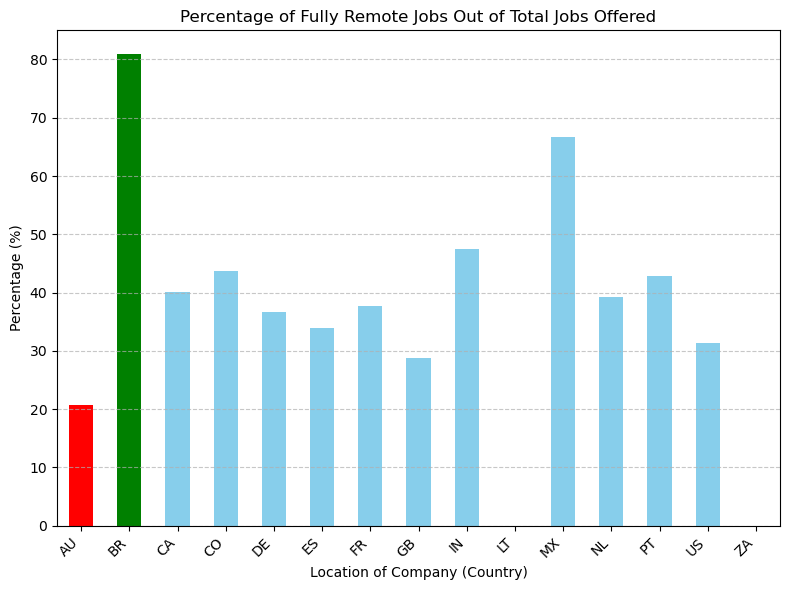

In [14]:
remote_ratio_counts = clean_df.groupby('Location of Company')['Remote Ratio'].value_counts().unstack()
print(remote_ratio_counts)

# Display the result

total_counts = remote_ratio_counts.sum(axis=1)

# Calculate the percentage of the total represented by '100' counts
percentage_100_counts = (remote_ratio_counts[100] / total_counts) * 100

# Display the result
colors = ['skyblue'] * len(percentage_100_counts)
max_index = percentage_100_counts.idxmax()
min_index = percentage_100_counts.idxmin()
colors[percentage_100_counts.index.get_loc(max_index)] = 'g'
colors[percentage_100_counts.index.get_loc(min_index)] = 'r'  # Change color of the highest value bar
plt.figure(figsize=(8, 6))
percentage_100_counts.plot(kind='bar', color=colors)

# Add titles and labels
plt.title('Percentage of Fully Remote Jobs Out of Total Jobs Offered')
plt.xlabel('Location of Company (Country)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)



# Display the plot
plt.tight_layout()
plt.savefig("images/remote_country.png")
plt.show()



Based on the dataset given, Brazilian companies on average offer the most remote oppportunities for work, while Australian companies on averagfe offer the fewest remote oppportunities

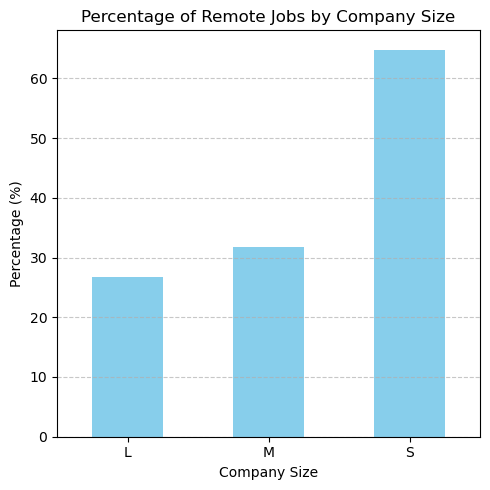

In [15]:
remote_ratio_counts = clean_df.groupby('Company Size')['Remote Ratio'].value_counts().unstack()

# Display the result

total_counts = remote_ratio_counts.sum(axis=1)

# Calculate the percentage of the total represented by '100' counts
percentage_100_counts = (remote_ratio_counts[100] / total_counts) * 100

# Display the result
plt.figure(figsize=(5, 5))
percentage_100_counts.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Percentage of Remote Jobs by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Percentage (%)')
plt.xticks(rotation = "horizontal")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.savefig("images/remote_company_size.png")
plt.show()


Based on the analysis of this dataset, remote job opportunities appear to be more available from smaller companies